In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt


In [59]:
def real(x):
    return np.sin(np.pi*x*20)

In [60]:
A = 0
B = 1
n = 141
h = (B-A)/(n-1)
x_j = np.linspace(A, B, n)


    
def q(x):
    return 2*np.sin(15*x)
def k(x):
    return 2*x
def f(k,q,real,a,b):
    
    du = lambda a: (real(a+1/10000) - real(a))/(1/10000)
    f_x = lambda x: -(k(x+1/10000)*du(x+1/10000) - k(x)*du(x))/(1/10000) + q(x)*real(x)  
    return f_x

In [61]:
rhs = f(k,q,real,A,B)
rhs(1)

-76.04836529694126

In [62]:
x_j

array([0.        , 0.00714286, 0.01428571, 0.02142857, 0.02857143,
       0.03571429, 0.04285714, 0.05      , 0.05714286, 0.06428571,
       0.07142857, 0.07857143, 0.08571429, 0.09285714, 0.1       ,
       0.10714286, 0.11428571, 0.12142857, 0.12857143, 0.13571429,
       0.14285714, 0.15      , 0.15714286, 0.16428571, 0.17142857,
       0.17857143, 0.18571429, 0.19285714, 0.2       , 0.20714286,
       0.21428571, 0.22142857, 0.22857143, 0.23571429, 0.24285714,
       0.25      , 0.25714286, 0.26428571, 0.27142857, 0.27857143,
       0.28571429, 0.29285714, 0.3       , 0.30714286, 0.31428571,
       0.32142857, 0.32857143, 0.33571429, 0.34285714, 0.35      ,
       0.35714286, 0.36428571, 0.37142857, 0.37857143, 0.38571429,
       0.39285714, 0.4       , 0.40714286, 0.41428571, 0.42142857,
       0.42857143, 0.43571429, 0.44285714, 0.45      , 0.45714286,
       0.46428571, 0.47142857, 0.47857143, 0.48571429, 0.49285714,
       0.5       , 0.50714286, 0.51428571, 0.52142857, 0.52857

In [63]:
def find_phi(x,j):

    if x < x_j[j-1] or x> x_j[j+1]:
        return 0
    elif x <= x_j[j]:
        return (x-x_j[j-1])/h
    else:
        return (x_j[j+1]-x)/h

In [64]:
alpha_ii = np.zeros((n-1,n-1))
alpha_ii


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
acc = 1000
step = h/(acc-1)

for i in range(1,n-1):
    sum_ii = 0  
    for l in range(acc):
        sum_ii+= (-k(x_j[i]-h+l*step ) + (x_j[i]-h+l*step - x_j[i-1])*(x_j[i] - (x_j[i]-h+l*step))*q(x_j[i]-h+l*step))*step
    alpha_ii[i,i-1] = 1/h**2* sum_ii
for i in range(n-2):
    sum_ii = 0  
    for l in range(acc):
        sum_ii+= (-k(x_j[i]+l*step) + (x_j[i]+l*step - x_j[i])*(x_j[i+1] - (x_j[i]+l*step))*q(x_j[i]+l*step))*step
    alpha_ii[i,i+1] = 1/h**2* sum_ii
for i in range(n-1):
    sum_ii = 0  
    for l in range(acc):
        sum_ii+= (k(x_j[i]-h+l*step) + (x_j[i]-h+l*step - x_j[i-1])**2*q(x_j[i-1]+l*step))*step
        sum_ii+= (k(x_j[i]+l*step) + (-x_j[i]-l*step + x_j[i+1])**2*q(x_j[i]+l*step))*step
    alpha_ii[i,i] = 1/h**2* sum_ii    
print(A)
alpha_ii

0


array([[ 171.76789189,   -1.00087355,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [  -1.00087355,    4.00502341,   -3.0026221 , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,   -3.0026221 ,    8.01003512, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  548.55671789,
        -275.27330403,    0.        ],
       [   0.        ,    0.        ,    0.        , ..., -275.27330403,
         552.56014971, -277.27546   ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
        -277.27546   ,  556.5634944 ]])

In [66]:
b_ii = np.zeros(n-1)


b_ii= b_ii.T
b_ii
    

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [67]:
acc = 1000
step = h/(acc-1)
for i in range(0,n-1):
    sum_ii = 0  
    for l in range(acc):
        sum_ii+= (rhs(x_j[i]+l*step)*(x_j[i+1] - (x_j[i]+l*step)))*step
        sum_ii+= (rhs(x_j[i]-h+l*step)*( l*step  ))*step
    b_ii[i] = 1/h * sum_ii
b_ii

array([ -0.85364814,  -0.59063956,   0.09958568,   0.9837017 ,
         1.74767559,   2.08650859,   1.79510648,   0.83623839,
        -0.63329599,  -2.28719505,  -3.70130727,  -4.45681226,
        -4.25068468,  -2.98610301,  -0.81887297,   1.85472303,
         4.46994005,   6.41245407,   7.15916238,   6.40921516,
         4.17388985,   0.80151183,  -3.07288323,  -6.6468569 ,
        -9.11648401,  -9.85462334,  -8.56246022,  -5.35889695,
        -0.78411264,   4.28877131,   8.82010937,  11.81655808,
        12.54678942,  10.71361628,   6.54304591,   0.76665348,
        -5.50460127, -10.99382758, -14.51796005, -15.24102298,
       -12.8670008 ,  -7.72871884,  -0.74914462,   6.72261829,
        13.17189175,  17.22526115,  17.94157695,  15.02573537,
         8.91748003,   0.731623  ,  -7.94389393, -15.35584995,
       -19.93986697, -20.64931257, -17.19007065, -10.10923658,
        -0.71413239,   9.1677511 ,  17.54408739,  22.65926323,
        23.36123726,  19.35725182,  11.30228818,   0.69

In [68]:
y_i = np.linalg.solve(alpha_ii,b_ii)
#y_i = y

In [69]:
u_app = lambda x: np.sum([y_i[j]*find_phi(x,j) for j in range(n-1)])

In [70]:
X = np.linspace(A,B,1000)
Y_app = [u_app(x) for x in X]

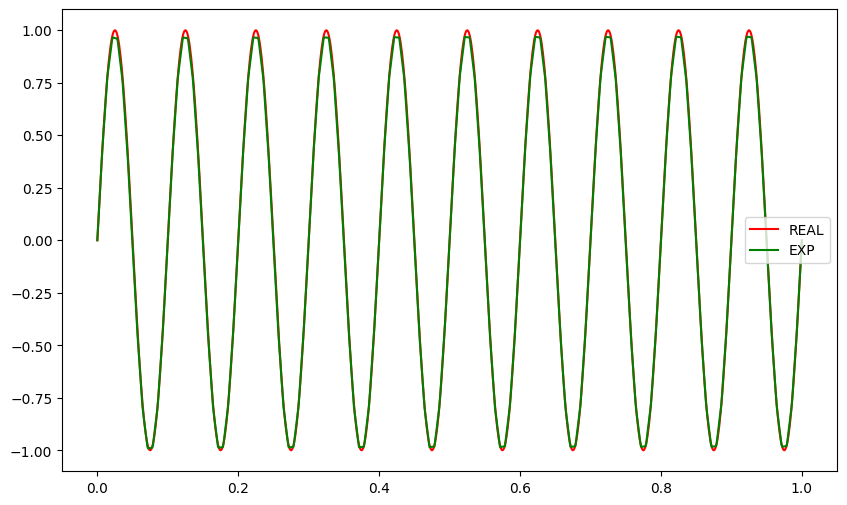

In [71]:
plt.figure(figsize=(10, 6))
plt.plot( X,real(X),c='r', label="REAL")
plt.plot( X,Y_app,c='g', label="EXP")
plt.legend()
plt.show()